## kismi en kucuk kareler regresonu - pls - model tuning

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
from sklearn.model_selection import KFold
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


warnings.simplefilter(action="ignore", category=FutureWarning)

hit = pd.read_csv('Hitters.csv')
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
x_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'],
             axis=1).astype('float64')
x = pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

Text(0.5, 1.0, 'salary')

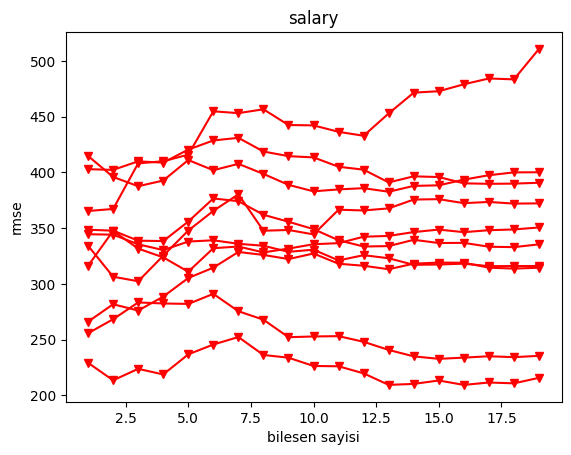

In [14]:
cv10 = KFold(n_splits=10, shuffle=True, random_state=1)

# hata hesaplamak icin dongu
RMSE = []

for i in np.arange(1, x_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, x_train, y_train, cv=cv10, scoring='neg_mean_squared_error'))
    RMSE.append(score)
    
# sonuclarin gorsellestirilmesi
plt.plot(np.arange(1, x_train.shape[1] + 1), np.array(RMSE), '-v', c='r')
plt.xlabel('bilesen sayisi')
plt.ylabel('rmse')
plt.title('salary')